# Collect simulation data for calibration points

In [2]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from positive import *
from nrutils import scsearch, gwylm
from glob import glob
import h5py
import pickle
from mpa import gwylmo_cpclean

(positive)>> Applying custom matplotlib settings.


## Outline

1. Load simulation 
2. Compute TD Psi4 Co-Precessing Frame 
3. Symmetrize the co-precessing frame data 
4. Output the symmetrized FD amplitude and phase along with diagnostic plots

## Notes & Conclusions

* Please see executable of the same name. This notebook is just for prototyping.
* minor modifications to this workflow were made for version2 data

## Preliminaries

In [3]:
# Define path for file IO
data_dir = '/Users/book/KOALA/puck/ll/data/version2/'

## Generate data

In [4]:
# Define simulations to load
simulation_keywords = ('q1a04t30_dPm2_T_96_552', 'q1a04t60_dPm1_T_96_552', 'q1a04t90_dP0_T_96_552', 'q1a04t120_dP0_T_96_552', 'q1a04t150_dP0_T_96_552',  'q1a08t30dPm25_T_96_408', 'q1a08t60dPm1.5_T_96_408', 'q1a08t90dPm1_T_96_408', 'q1a08t120dP0_T_96_408', 'q1a08t150dP0_T_96_408', 'q2a04t30dPm2_T_96_408', 'q2a04t60dPm1_T_96_408', 'q2a04t90dPm1_T_96_408', 'q2a04t120_T_96_408', 'q2a04t150_T_96_408', 'q2_a10_a28_ph0_th30', 'q2_a10_a28_ph0_th60', 'q2_a10_a28_ph0_th90', 'q2_a10_a28_ph0_th120', 'q2_a10_a28_ph0_th150', 'q4a04t30_T_96_360', 'q4a04t60dPm1.5D_T_96_360', 'q4a04t90_T_96_360', 'q4a04t120dP0D_T_96_360', 'q4a04t150_T_96_360', 'q4a08t30dPm5p5dRm47_T_96_360', 'q4a08t60dPm3dRm250_T_96_384', 'q4a08t90dPm1D_T_96_384', 'q4a08t120dP1_T_96_360', 'q4a08t150_T_96_360',  'q8a04t30dPm3_T_96_360', 'q8a04t60D_dPm1', 'q8a04t90dP0_T_96_360', 'q8a04t120dPp1_T_96_360', 'q8a04t150dP9_T_96_360', 'q8a08t30dPm9.35_r0.5_T_96_360', 'q8a08t60Ditm45dr075_96_360', 'q8a08t90dP0_T_96_384', 'q8a08t120dP2_r03_T_96_360', 'q8a08t150dP2_T_120_480')

### Find simulations using scsearch 

In [5]:
A = scsearch( keyword=simulation_keywords, notkeyword=('80_Points','ASJmodified','.0.1.0','q8precessing/q8a04t60D_dPm1/'), verbose= True, unique=True )

(scsearch)>> Found keyword (=('q1a04t30_dPm2_T_96_552', 'q1a04t60_dPm1_T_96_552', 'q1a04t90_dP0_T_96_552', 'q1a04t120_dP0_T_96_552', 'q1a04t150_dP0_T_96_552', 'q1a08t30dPm25_T_96_408', 'q1a08t60dPm1.5_T_96_408', 'q1a08t90dPm1_T_96_408', 'q1a08t120dP0_T_96_408', 'q1a08t150dP0_T_96_408', 'q2a04t30dPm2_T_96_408', 'q2a04t60dPm1_T_96_408', 'q2a04t90dPm1_T_96_408', 'q2a04t120_T_96_408', 'q2a04t150_T_96_408', 'q2_a10_a28_ph0_th30', 'q2_a10_a28_ph0_th60', 'q2_a10_a28_ph0_th90', 'q2_a10_a28_ph0_th120', 'q2_a10_a28_ph0_th150', 'q4a04t30_T_96_360', 'q4a04t60dPm1.5D_T_96_360', 'q4a04t90_T_96_360', 'q4a04t120dP0D_T_96_360', 'q4a04t150_T_96_360', 'q4a08t30dPm5p5dRm47_T_96_360', 'q4a08t60dPm3dRm250_T_96_384', 'q4a08t90dPm1D_T_96_384', 'q4a08t120dP1_T_96_360', 'q4a08t150_T_96_360', 'q8a04t30dPm3_T_96_360', 'q8a04t60D_dPm1', 'q8a04t90dP0_T_96_360', 'q8a04t120dPp1_T_96_360', 'q8a04t150dP9_T_96_360', 'q8a08t30dPm9.35_r0.5_T_96_360', 'q8a08t60Ditm45dr075_96_360', 'q8a08t90dP0_T_96_384', 'q8a08t120dP2_r03_

In [6]:
alert('We have found %i simulations.'%len(A))

(notebook)>> We have found 40 simulations.


### Load NR data and process

In [72]:

# Define loading parameters 
lmax = 2
pad = 1000
clean = True
dt = 0.5

#
for a in A:
    
    if 'q2_a10_a28_ph0_th30' in a.simname:
    
        #
        alert(a.simname)
        y_raw = gwylm(a,lmax=lmax,dt=dt,pad=pad,clean=clean,verbose=True)

        #
        break
    
    

(notebook)>> q2_a10_a28_ph0_th30
(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found dt (=0.5) keyword.
(gwylm)>> Found enforce_m_relative_sign_convention (=True) keyword.
(gwylm)>> Found lmax (=2) keyword.
(gwylm)>> Found load_dynamics (=True) keyword.
(gwylm)>> Found pad (=1000) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x11eee6230>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(__init__)>> Using default M_RELATIVE_SIGN_CONVENTION of 1
(gwylm)>> The (extraction_parameter,level) is (5,7), which differs from the config values of (5,5). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, 2), (2, -2), (2, -1), (2, 0), (2, 1)]
(load)>> Using the default extraction_parameter of 5
(load)>> Using the default level of 7
(load)>> Loading: psi3col.r5.l7.l2.m2.gz
(straighten_wfarr!)>> The time

In [73]:
# Manage frames 
frame = {}
frame['raw'] = y_raw

# Put in initial J frame
frame['init-j'] = y_raw.__calc_initial_j_frame__()
frame['j-of-t'] = frame['init-j'].__calc_j_of_t_frame__(use_mask_and_preserve_length=not True)

# # Compute TD adn FD coprecessing psi4 frames
# frame['cp-y-fd'] = frame['j-of-t'].__calc_coprecessing_frame__( transform_domain='fd', kind='psi4' )
# frame['cp-y-td'] = frame['j-of-t'].__calc_coprecessing_frame__( transform_domain='td', kind='psi4' )

# # Compute TD adn FD coprecessing strain frames
# frame['cp-h-fd'] = frame['j-of-t'].__calc_coprecessing_frame__( transform_domain='fd', kind='strain' )
# frame['cp-h-td'] = frame['j-of-t'].__calc_coprecessing_frame__( transform_domain='td', kind='strain' )

(__rotate_frame_at_all_times__)>> Attempting to rotate dynamics timeseries in this.dynamics
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.
(__rotate_frame_at_all_times__)>> Attempting to rotate dynamics timeseries in this.dynamics
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.


In [74]:
# # Symmetrise data
# foo = dict(frame)
# for k in frame:
#     if 'cp' in k:
#         foo['sym-'+k] = frame[k].__symmetrize__()
        

In [75]:

# Symmetrize the psi4 time domain coprecessing frame waveform, and return to the init-j frame
foo['commet-init-j'] = gwylmo_cpclean( frame['init-j'], cp_domain='td' )

# Calculate the coprecessing frame for the case above
# Compute TD adn FD coprecessing psi4 frames
foo['commet-sym-cp-y-fd'] = foo['commet-init-j'].__calc_coprecessing_frame__( transform_domain='fd', kind='psi4' )
foo['commet-sym-cp-y-td'] = foo['commet-init-j'].__calc_coprecessing_frame__( transform_domain='td', kind='psi4' )

# Compute TD adn FD coprecessing strain frames
foo['commet-sym-cp-h-fd'] = foo['commet-init-j'].__calc_coprecessing_frame__( transform_domain='fd', kind='strain' )
foo['commet-sym-cp-h-td'] = foo['commet-init-j'].__calc_coprecessing_frame__( transform_domain='td', kind='strain' )

(gwylmo_cpclean)>> Using the Time Domain coprecessing frame for cleaning.
(__rotate_frame_at_all_times__)>> Attempting to rotate dynamics timeseries in this.dynamics
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.
(__calc_coprecessing_frame__)>> We will use psi4 to compute the co-precessing frame.
(__calc_coprecessing_frame__)>> Transforming to the coprecessing frame using TD angles.
(calc_coprecessing_angles)>> The domain values seem unevenly split between positive and negative values. Thus, we will interpret the input as corresponding to TIME DOMAIN data.
(__calc_coprecessing_frame__)>> Storing radiation axis information to this.radiation_axis_info
(__rotate_frame_at_all_times__)>> Attempting to rotate dynamics timeseries in this.dynamics
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e

In [76]:

# Symmetrize the psi4 time domain coprecessing frame waveform, and return to the init-j frame
foo['star-init-j'] = gwylmo_cpclean( frame['init-j'], cp_domain='td' )

# Calculate the coprecessing frame for the case above
# Compute TD adn FD coprecessing psi4 frames
foo['star-sym-cp-y-fd'] = foo['star-init-j'].__calc_coprecessing_frame__( transform_domain='fd', kind='psi4' )
foo['star-sym-cp-y-td'] = foo['star-init-j'].__calc_coprecessing_frame__( transform_domain='td', kind='psi4' )

# Compute TD adn FD coprecessing strain frames
foo['star-sym-cp-h-fd'] = foo['star-init-j'].__calc_coprecessing_frame__( transform_domain='fd', kind='strain' )
foo['star-sym-cp-h-td'] = foo['star-init-j'].__calc_coprecessing_frame__( transform_domain='td', kind='strain' )

(gwylmo_cpclean)>> Using the Time Domain coprecessing frame for cleaning.
(__rotate_frame_at_all_times__)>> Attempting to rotate dynamics timeseries in this.dynamics
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.
(__calc_coprecessing_frame__)>> We will use psi4 to compute the co-precessing frame.
(__calc_coprecessing_frame__)>> Transforming to the coprecessing frame using TD angles.
(calc_coprecessing_angles)>> The domain values seem unevenly split between positive and negative values. Thus, we will interpret the input as corresponding to TIME DOMAIN data.
(__calc_coprecessing_frame__)>> Storing radiation axis information to this.radiation_axis_info
(__rotate_frame_at_all_times__)>> Attempting to rotate dynamics timeseries in this.dynamics
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e

In [77]:
#
frame = foo

In [78]:
# Produce diagnostic plots 
def plot_amp_dphi(frame):

    #
    fig = figure( figsize=4*figaspect(0.8) )

    #
    y0,y1 = -inf,1e4
    kind = 'psi4' # kind used to measure smoothness of phase derivate
    D0 = mean( frame['star-sym-cp-y-fd'][2,2][kind].fd_dphi )
    smoothness_measure = {}
    case_test = lambda k: (('star' in k) or ( 'commet' in k )) and ( not ('init' in k) ) and ( not ('h' in k) ) and ( not ('-of-' in k) )
    #case_test = lambda k: ('j' in k) 

    #
    for k in sort(frame.keys())[::-1]:

        #
        if case_test(k):

            f = frame[k].f
            mask = ((f)>0.02) & ((f)<0.06)
            this_smoothness_measure = abs( std( frame[k][2,2][kind].fd_dphi[mask]-smooth(frame[k][2,2][kind].fd_dphi[mask]).answer ) )
            smoothness_measure[k] = this_smoothness_measure 

    #
    for k in sort(frame.keys())[::-1]:

        #
        if case_test(k):

            #
            is_best = smoothness_measure[k]==min(smoothness_measure.values())

            #
            alp = 1 if 'star' in k else 0.14
            ls = ':' if not ('sym' in k) else '-'
            ls = '-.' if ('td' in k) and not ('star' in k) else ls
            lw = 2

            #
            ax1 = subplot(2,1,1)
            kind = 'strain'
            f = frame[k].f
            mask = abs(f)<0.1
            ln = plot( f, frame[k][2,2][kind].fd_amp, label=k, alpha=1 if is_best else 0.2, ls=ls if not is_best else '-', lw=lw if not is_best else 2 )
            #ln = plot( f, frame[k][2,2][kind].fd_amp, label=k, alpha=alp, ls=ls, lw=lw )
            ylabel(r'$|\tilde{h}_{22}|$')
            yscale('log')
            xlabel('$fM$')
            xscale('log')
            xlim( 0.008, 0.15 )
            ylim( 1e0,1e2 )
            legend(ncol=2)

            #
            ax2 = subplot(2,1,2)
            f = frame[k].f
            mask = ((f)>0.02) & ((f)<0.06)
            kind = 'psi4'
            #smoothness_measure = abs( std( frame[k][2,2][kind].fd_dphi[mask]-smooth(frame[k][2,2][kind].fd_dphi[mask]).answer ) )
            if True: #smoothness_measure[k]<10:
                plot( f, frame[k][2,2][kind].fd_dphi-D0, label=k, alpha=1 if is_best else 0.2, ls=ls if not is_best else '-', lw=lw if not is_best else 2, color=ln[0].get_color() )
                xlabel('$fM$')
                xlim( 0.02, 0.15 )
                ya,yb = lim( frame[k][2,2][kind].fd_dphi[mask]-D0 )
                y0 = max( ya,y0 )
                y1 = min( yb,y1 )
                b = 0.25*abs(y1-y0)
                ylim( y0-b,y1+b )
            #
            legend(ncol=2)
            xlabel('$fM$')
            ylabel(r'$\frac{d}{df}\arg(\tilde{\psi}_4)$')


    #
    subplot(2,1,1)
    title(y_raw.simname)

    #
    return fig,[ax1,ax2]

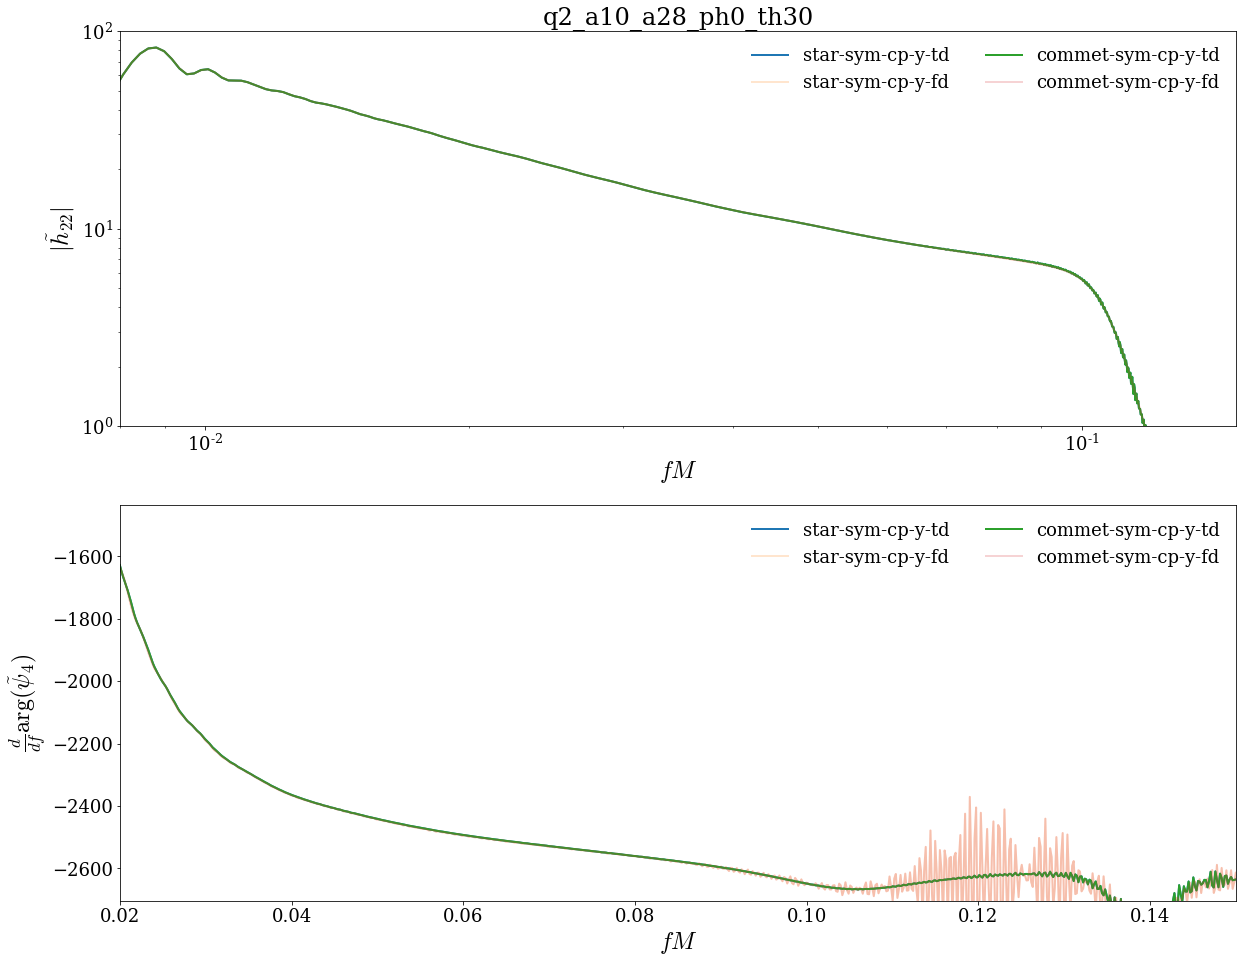

In [79]:
# Produce diagnostic plots 
    
#
fig,ax = plot_amp_dphi(frame)
file_path = data_dir+'%s.png'%frame['raw'].simname
# alert('Saving diagnostic plot to "%s"'%yellow(file_path))
# savefig( file_path )

In [10]:
# save data
import pickle
import dill

#
k = frame['raw'].f>0
f_raw = frame['raw'].f
amp_raw  = frame['sym-cp-y-fd'][2,2]['strain'].fd_amp
phi_raw = frame['sym-cp-y-td'][2,2]['psi4'].fd_phi
dphi_raw = frame['sym-cp-y-td'][2,2]['psi4'].fd_dphi
# data_array = array([ f, amp, dphi ]).T[k]

# #
# file_path = data_dir+'%s.txt'%frame['raw'].simname
# alert('Saving waveform data to "%s"'%yellow(file_path))
# # pickle.dump( data_array, open( file_path, "wb" ) )
# savetxt( file_path, data_array, header='[ f, fd_amp, fd_dphi ], frequencies are positive, waveform info are symmetrized from NR simulation at %s'%frame['raw'].simdir )

In [11]:
fmin,fmax = 0.03,0.12
mask = (f_raw>=fmin) & (f_raw<=fmax)
phi = phi_raw[mask]
dphi = dphi_raw[mask]
smoo_dphi = smooth(dphi).answer
f = f_raw[mask]

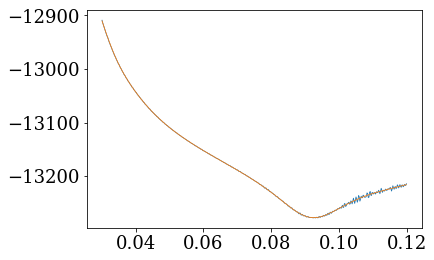

In [12]:
plot( f, dphi )
plot( f, smoo_dphi )

In [13]:
shift_dex = argmin( smoo_dphi )
dphi_shift = smoo_dphi[ shift_dex ]
#
phi1  = phi - f * dphi_shift
dphi1 = dphi - dphi_shift
#
phi2 = phi1 - phi1[ shift_dex ]

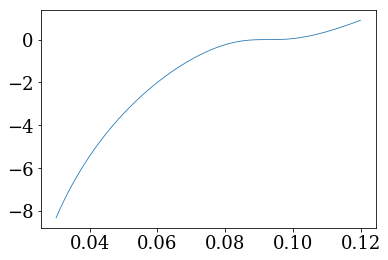

In [14]:
plot( f, phi2 )

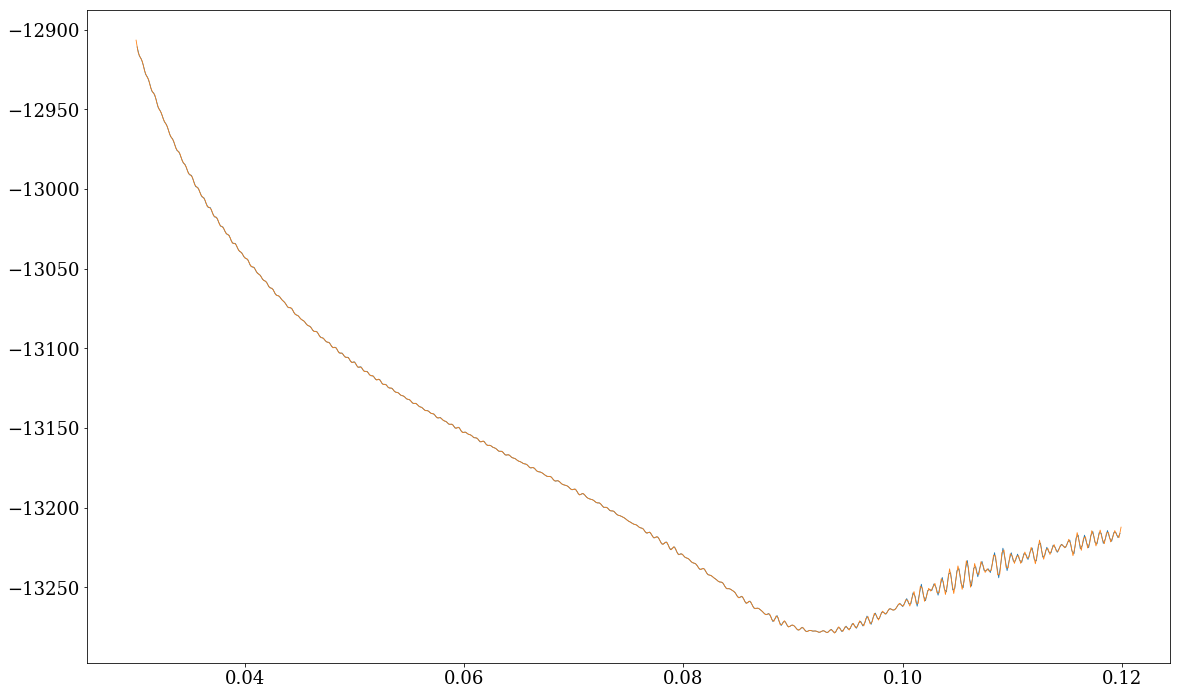

In [15]:

figure( figsize=3*figaspect(0.618) )
plot( f[1:]-diff(f)[0]/2, diff(phi)/diff(f) )
plot( f, spline_diff(f,phi) )